In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("datasets/house_price.csv")
dataset.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,221900
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,538000
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,180000


### Now we have to check first If regularization can be applied on the data set or not by using correlation matrix

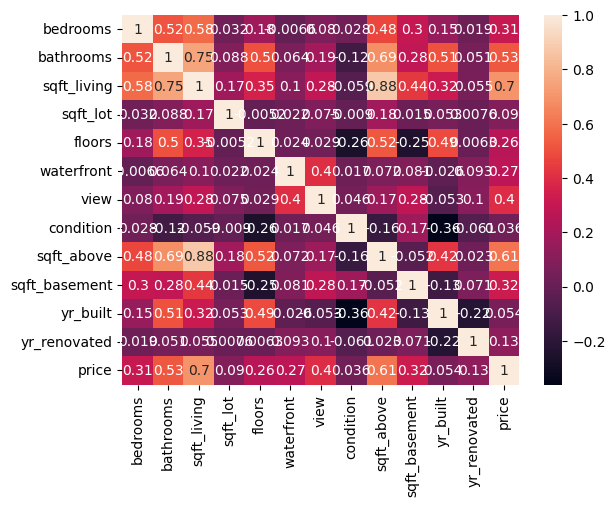

In [3]:
# plt.figure(figsize=(10, 8))
sns.heatmap(data = dataset.corr(), annot=True)
plt.show()

In [4]:
x = dataset.iloc[:,:-1]
y = dataset["price"]

In [5]:
# Scaling the features
scaler = StandardScaler() # Initialize the scaler
scaler.fit(x) # Fit the scaler to the data
# Transform the data
x = pd.DataFrame(scaler.transform(x), columns=x.columns) # create a DataFrame with the same column names
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.734708,-0.658681,-0.544898,-0.210128
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,0.460841,0.245141,-0.681079,4.746678
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.229834,-0.658681,-1.293892,-0.210128
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.891699,1.397515,-0.204446,-0.210128
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,-0.130895,-0.658681,0.544548,-0.210128
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,-0.312039,-0.658681,1.293542,-0.210128
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.629908,-0.658681,1.463768,-0.210128
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.927928,-0.658681,1.293542,-0.210128
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,-0.227505,-0.658681,1.123316,-0.210128


In [6]:
# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # to evaluate the model performance
import numpy as np # to calculate RMSE

# LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)
# lr.score(x_test, y_test)*100

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# lr.coef_ # to get the coefficients of the features or columns
# x.columns # to get the names of the features or columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [32]:
# comparing the coefficients of the columns

print("MSE: ",mean_squared_error(y_test, lr.predict(x_test))) # to get the mean squared error
print("MAE: ",mean_absolute_error(y_test, lr.predict(x_test))) # to get the mean absolute error

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))) 

MSE:  60651868368.86791
MAE:  158276.98831495034
RMSE:  246276.00039156864


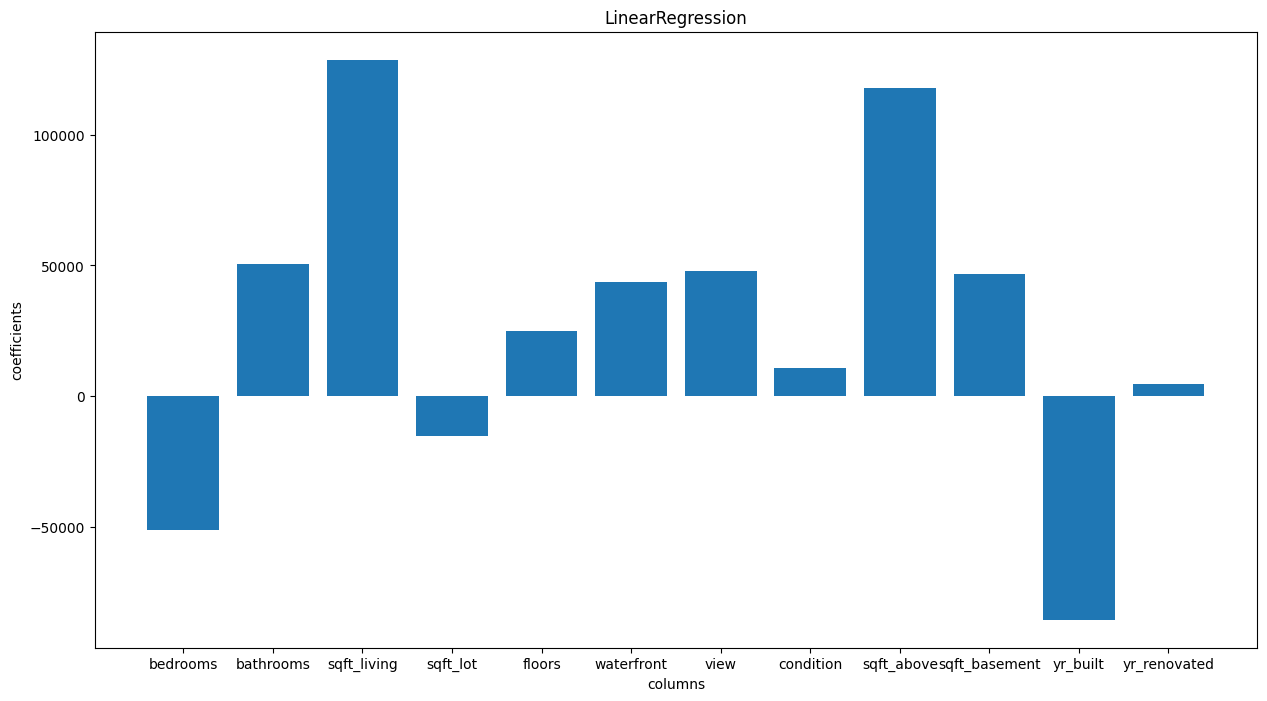

In [18]:
plt.figure(figsize=(15, 8))
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coefficients")
plt.show()

# Lasso

In [25]:
la = Lasso(alpha=0.1) # alpha is the regularization parameter
la.fit(x_train, y_train)
la.score(x_test, y_test)*100

d:\VS Code Files\AIML\ML-Notebook\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.543e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


59.88015341462577

In [ ]:
# comparing the coefficients of the columns

print(
    "MSE: ", mean_squared_error(y_test, la.predict(x_test))
)  # to get the mean squared error
print(
    "MAE: ", mean_absolute_error(y_test, la.predict(x_test))
)  # to get the mean absolute error

print("RMSE: ", np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

MSE:  60651865030.263504
MAE:  158276.99432533752
RMSE:  246275.99361339203


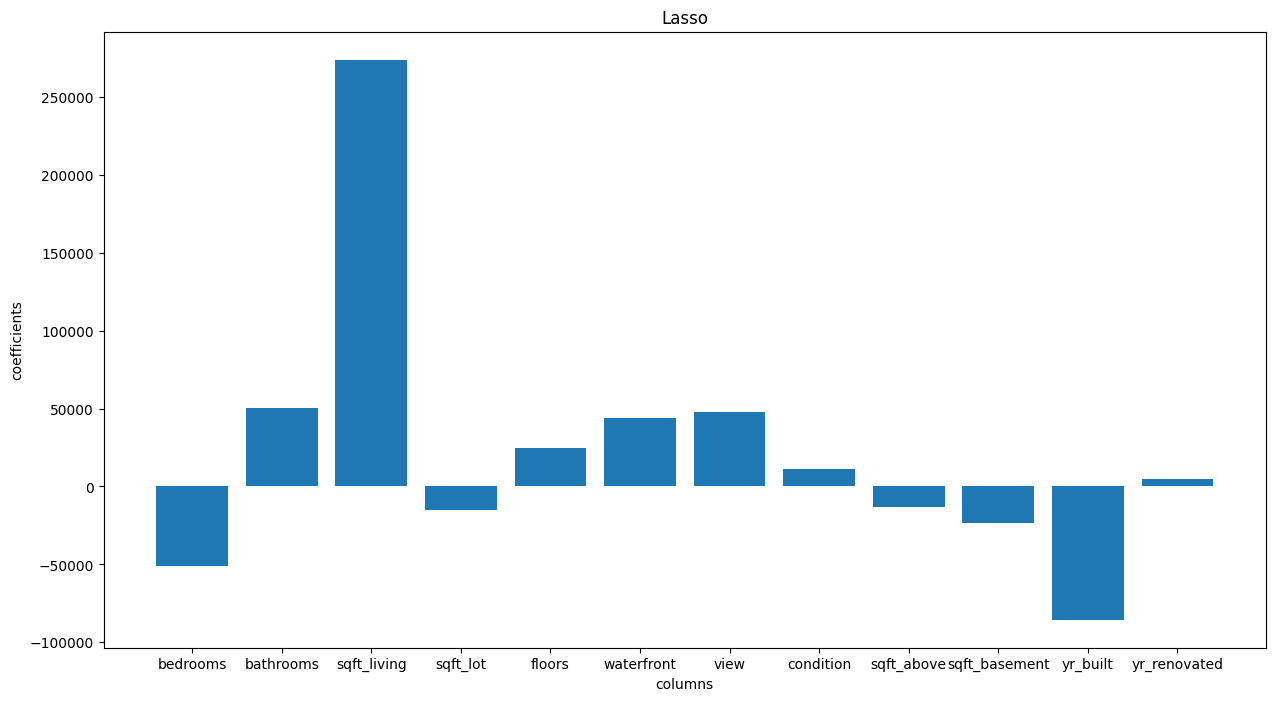

In [26]:
plt.figure(figsize=(15, 8))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coefficients")
plt.show()

# Ridge

In [27]:
ri = Ridge(alpha=0.1) # alpha is the regularization parameter
ri.fit(x_train, y_train)
ri.score(x_test, y_test)*100

59.88014714592423

In [34]:
# comparing the coefficients of the columns

print(
    "MSE: ", mean_squared_error(y_test, ri.predict(x_test))
)  # to get the mean squared error
print(
    "MAE: ", mean_absolute_error(y_test, ri.predict(x_test))
)  # to get the mean absolute error

print("RMSE: ", np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

MSE:  60651874507.08039
MAE:  158276.861947092
RMSE:  246276.01285362808


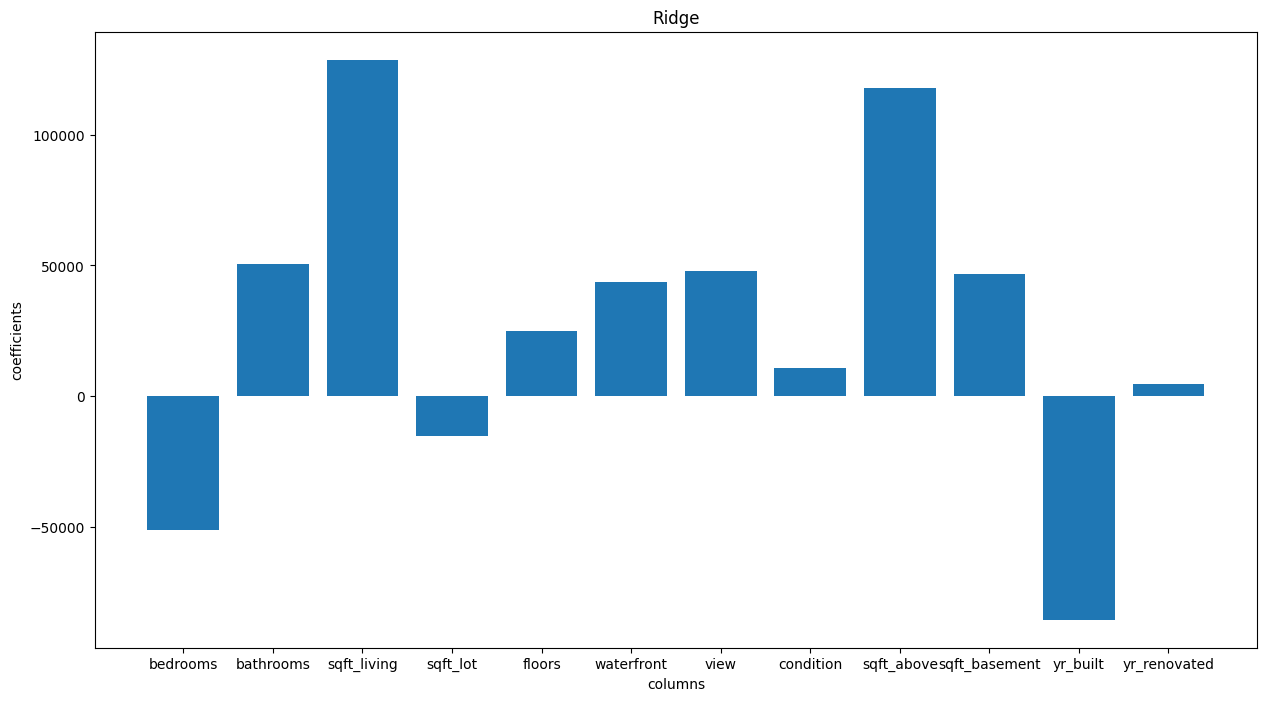

In [28]:
plt.figure(figsize=(15, 8))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coefficients")
plt.show()

Comparing the coefficient values side by side

In [36]:
df = pd.DataFrame({"col_name": x.columns, "LinearRegression": lr.coef_, "Lasso": la.coef_, "Ridge": ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-51407.404301,-51407.279335,-51406.224105
1,bathrooms,50468.648125,50467.994359,50468.461750
2,sqft_living,128800.330376,274021.726098,128799.434097
3,sqft_lot,-15227.968697,-15227.837344,-15227.623326
4,floors,24778.379037,24778.439338,24778.287652
5,waterfront,43709.207647,43709.142668,43709.051957
6,view,47825.930745,47825.892207,47826.116415
7,condition,10951.479987,10951.371487,10951.630376
8,sqft_above,117875.629021,-13059.531647,117874.742723
9,sqft_basement,46735.003329,-23243.416934,46734.801706
